In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import display

precovid = "/Users/sarahyuhan/BostonBusEquity/2015-2017.xlsx"
df_pre = pd.read_excel(precovid)

postcovid = "/Users/sarahyuhan/BostonBusEquity/2023.csv"
df_post = pd.read_csv(postcovid)

df_pre.head(), df_post.head()


(                 Mode  Trip purpose: Home-based work  \
 0                 Bus                         230731   
 1       Commuter Rail                         109399   
 2               Ferry                           4191   
 3         Silver Line                          20707   
 4  Rail Rapid Transit                         508204   
 
    Trip purpose: Home-based school  Trip purpose: Home-based social activity  \
 0                            27070                                     13451   
 1                             2765                                      1733   
 2                                0                                        57   
 3                              881                                       819   
 4                            40172                                     40174   
 
    Trip purpose: Home-based other  Trip purpose: Non-home-based  \
 0                           40299                         19531   
 1                            34

In [2]:
df_pre = df_pre[df_pre['Mode'] == 'Bus']
df_post = df_post[df_post['service_mode'] == 'Bus']

In [3]:
df_pre.head(),df_post.head()

(  Mode  Trip purpose: Home-based work  Trip purpose: Home-based school  \
 0  Bus                         230731                            27070   
 
    Trip purpose: Home-based social activity  Trip purpose: Home-based other  \
 0                                     13451                           40299   
 
    Trip purpose: Non-home-based  Count: Trip purpose  \
 0                         19531                33584   
 
    Trip frequency: 6-7 days a week  Trip frequency: 5 days a week  \
 0                            45942                         194400   
 
    Trip frequency: 3-4 days a week  ...  Gender: Woman  Gender: Other  \
 0                            51109  ...         224195            567   
 
    Gender: Prefer not to say  Count: Gender  \
 0                       7263          35858   
 
    Ability to understand English: Always  \
 0                                 336719   
 
    Ability to understand English: Often  \
 0                                  9947   


In [5]:
# Step 1: Create a mapping of categories from df_post
df_post.columns = df_post.columns.str.strip().str.lower()
df_post['full_category'] = df_post['measure_group'] + ": " + df_post['category']

# Step 2: Extract unique category names
category_mapping = df_post[['category', 'full_category']].drop_duplicates().set_index('category').to_dict()['full_category']

# Step 3: Rename df_pre columns using this mapping
df_post.rename(columns=lambda x: x.strip(), inplace=True)

df_post.rename(columns={
    'weighted_percent': 'percentage'
}, inplace=True)


df_pre.columns, df_post.columns


(Index(['Mode', 'Trip purpose: Home-based work',
        'Trip purpose: Home-based school',
        'Trip purpose: Home-based social activity',
        'Trip purpose: Home-based other', 'Trip purpose: Non-home-based',
        'Count: Trip purpose', 'Trip frequency: 6-7 days a week',
        'Trip frequency: 5 days a week', 'Trip frequency: 3-4 days a week',
        ...
        'Gender: Woman', 'Gender: Other', 'Gender: Prefer not to say',
        'Count: Gender', 'Ability to understand English: Always',
        'Ability to understand English: Often',
        'Ability to understand English: Sometimes',
        'Ability to understand English: Never',
        'Ability to understand English: Prefer not to say',
        'Count: Ability to understand English'],
       dtype='object', length=113),
 Index(['aggregation_level', 'service_mode', 'reporting_group', 'measure_group',
        'measure', 'category', 'percentage', 'objectid', 'full_category'],
       dtype='object'))

In [6]:
print(df_post.isnull().sum())
df_post = df_post.dropna()
df_pre = df_pre.dropna()

aggregation_level    0
service_mode         0
reporting_group      0
measure_group        0
measure              0
category             1
percentage           0
objectid             0
full_category        1
dtype: int64


In [7]:
print("Columns in df_post:", df_post.columns)


Columns in df_post: Index(['aggregation_level', 'service_mode', 'reporting_group', 'measure_group',
       'measure', 'category', 'percentage', 'objectid', 'full_category'],
      dtype='object')


In [9]:
#COMPARING PERCENTAGES in number of people from each category taking the bus pre covid and post covid
# Ensure column names in df_post are standardized
df_post.columns = df_post.columns.str.strip().str.lower()
df_post["percentage"] = df_post["percentage"] * 100

# Create a new column that combines 'measure_group' and 'measure'
df_post['full_category'] = df_post['measure'] + ": " + df_post['category']

# Extract unique category names from df_post for renaming df_pre
category_mapping = df_post[['category', 'full_category']].drop_duplicates().set_index('category').to_dict()['full_category']

# Drop non-numeric columns from df_pre and convert to numeric
df_pre_numeric = df_pre.drop(columns=["Mode"], errors="ignore").apply(pd.to_numeric, errors="coerce")

# Compute category-wise totals by summing all values in each measure group
category_totals = df_pre_numeric.groupby(lambda x: x.split(":")[0], axis=1).sum()

# Compute pre-COVID percentages based on the corresponding category total
pre_percentages = df_pre_numeric.apply(lambda x: (x / category_totals[x.name.split(":")[0]]) * 100 if x.name.split(":")[0] in category_totals else x, axis=0)

# Rename df_pre columns using category_mapping to match df_post
pre_percentages = pre_percentages.rename(columns=category_mapping)

# Convert to DataFrame for merging
pre_percentages = pre_percentages.T.reset_index()
pre_percentages.columns = ['full_category', 'pre_covid_percent']

# Merge with df_post based on full_category
df_comparison = pd.merge(pre_percentages, df_post[['measure_group', 'full_category', 'percentage']], 
                         on="full_category", how="inner")

# **Step 1: Create Separate Tables for Each Measure**
grouped_tables = {measure: data for measure, data in df_comparison.groupby("measure_group")}

# **Step 2: Display Each Table Separately**
for measure, table in grouped_tables.items():
    print(f"\nComparison Table for {measure}:")
    display(table)


Comparison Table for Other Demographics:


/var/folders/gh/8gsn76px7tn2s_cff89q_8ww0000gn/T/ipykernel_22866/2479211344.py:16: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  category_totals = df_pre_numeric.groupby(lambda x: x.split(":")[0], axis=1).sum()


,full_category,pre_covid_percent,measure_group,percentage
444,Age: Under 18,3.430653,Other Demographics,2.018566
445,Age: Under 18,3.430653,Other Demographics,1.823332
446,Age: Under 18,3.430653,Other Demographics,3.814654
447,Age: Under 18,3.430653,Other Demographics,2.036507
448,Age: Under 18,3.430653,Other Demographics,3.624138
...,...,...,...,...
700,Gender: Prefer not to say,2.036513,Other Demographics,0.483237
701,Gender: Prefer not to say,2.036513,Other Demographics,0.754660
702,Gender: Prefer not to say,2.036513,Other Demographics,0.098510
703,Gender: Prefer not to say,2.036513,Other Demographics,1.218585



Comparison Table for Race and Ethnicity:


,full_category,pre_covid_percent,measure_group,percentage
0,Race: American Indian or Alaska Native,2.159216,Race and Ethnicity,5.608989
1,Race: American Indian or Alaska Native,2.159216,Race and Ethnicity,2.337947
2,Race: American Indian or Alaska Native,2.159216,Race and Ethnicity,2.371439
3,Race: American Indian or Alaska Native,2.159216,Race and Ethnicity,0.751672
4,Race: American Indian or Alaska Native,2.159216,Race and Ethnicity,13.907979
...,...,...,...,...
439,Hispanic or Latino/Latina: Prefer not to say,5.903813,Race and Ethnicity,0.444426
440,Hispanic or Latino/Latina: Prefer not to say,5.903813,Race and Ethnicity,1.546397
441,Hispanic or Latino/Latina: Prefer not to say,5.903813,Race and Ethnicity,1.347982
442,Hispanic or Latino/Latina: Prefer not to say,5.903813,Race and Ethnicity,1.000347


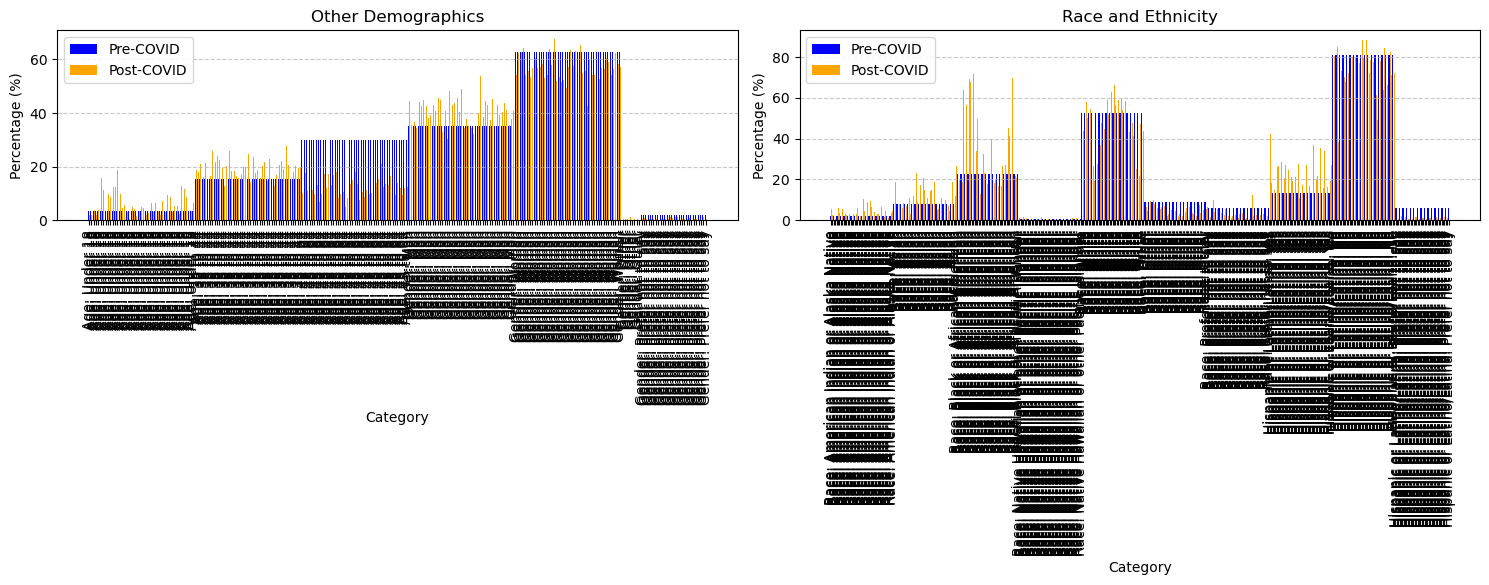

TypeError: DataFrame.pivot() takes 1 positional argument but 4 were given

In [10]:
plt.figure(figsize=(15, 8))
num_plots = len(grouped_tables)
colors = ['blue', 'orange']

for idx, (measure, table) in enumerate(grouped_tables.items(), 1):
    plt.subplot((num_plots // 2) + 1, 2, idx)  # Arrange subplots
    x = np.arange(len(table["full_category"]))
    
    plt.bar(x - 0.2, table["pre_covid_percent"], width=0.4, label="Pre-COVID", color=colors[0])
    plt.bar(x + 0.2, table["percentage"], width=0.4, label="Post-COVID", color=colors[1])

    plt.xticks(x, table["full_category"], rotation=90)
    plt.ylabel("Percentage (%)")
    plt.xlabel("Category")
    plt.title(measure)
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

# **Step 4: Heatmap for Overall Percentage Differences**
df_comparison["difference"] = df_comparison["pre_covid_percent"] - df_comparison["percentage"]
pivot_table = df_comparison.pivot("full_category", "measure_group", "difference")

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Pre vs Post COVID Percentage Differences by Measure")
plt.ylabel("Category")
plt.xlabel("Measure Group")
plt.show()

In [18]:
#now for identifying characteristics associated with lateness
# identify the routes that are later than usual and see which categories have higher percentages associated with those routes

# using simon's code computing lateness
import pandas as pd
import numpy as np
import glob
from tqdm import tqdm

# Step 1: Load CSV Files
file_pattern = "/Users/sarahyuhan/BostonBusEquity/MBTA-Bus-Arrival-Departure-Times_2023-*.csv"
file_paths = sorted(glob.glob(file_pattern))

# Step 2: Define Variables
chunksize = 500000
route_lateness = []
route_counts = []
route_ids = []

outlier_threshold = 3600  # Outlier threshold: 1 hour (3600 seconds)

# Ensure we have files
if not file_paths:
    print("No CSV files found. Check the file path!")

# Step 3: Process Each File in Chunks
for file_path in file_paths:
    print(f"Processing: {file_path}", flush=True)
    
    for chunk in tqdm(pd.read_csv(file_path, chunksize=chunksize), desc=f"Processing {file_path}"):
        # Convert time columns and remove invalid entries
        chunk["service_date"] = pd.to_datetime(chunk["service_date"], errors="coerce")
        chunk["scheduled"] = pd.to_datetime(chunk["scheduled"], errors="coerce")
        chunk["actual"] = pd.to_datetime(chunk["actual"], errors="coerce")
        chunk.dropna(subset=["service_date", "scheduled", "actual"], inplace=True)

        # Ensure proper timezone handling (remove timezone info if necessary)
        chunk["service_date"] = chunk["service_date"].dt.tz_localize(None)
        chunk["scheduled"] = chunk["scheduled"].dt.tz_localize(None)
        chunk["actual"] = chunk["actual"].dt.tz_localize(None)

        # Use reference time for accurate lateness calculation
        reference_time = pd.Timestamp("1900-01-01 00:00:00").tz_localize(None)
        chunk["scheduled_seconds"] = (chunk["scheduled"] - reference_time).dt.total_seconds()
        chunk["actual_seconds"] = (chunk["actual"] - reference_time).dt.total_seconds()

        # Adjust timestamps using service_date
        chunk["scheduled"] = chunk["service_date"] + pd.to_timedelta(chunk["scheduled_seconds"], unit="s")
        chunk["actual"] = chunk["service_date"] + pd.to_timedelta(chunk["actual_seconds"], unit="s")

        # Compute lateness
        chunk["lateness"] = (chunk["actual"] - chunk["scheduled"]).dt.total_seconds()

        # **Filter Outliers (Keep values within -1 hour to +1 hour)**
        chunk = chunk[chunk["lateness"].abs() <= outlier_threshold]

        # Group by route_id (sum of lateness, count of trips)
        grouped = chunk.groupby(["route_id"])["lateness"].agg(["sum", "count"]).reset_index()

        # Store results
        if not grouped.empty:
            route_lateness.append(grouped["sum"].values)
            route_counts.append(grouped["count"].values)
            route_ids.append(grouped["route_id"].values)

# Debugging print to check data collected
print(f"Route lateness collected: {len(route_lateness)}")
print(f"Route counts collected: {len(route_counts)}")
print(f"Route IDs collected: {len(route_ids)}")

# Step 4: Aggregate Total Lateness and Compute Average
total_lateness = sum(map(sum, route_lateness)) if route_lateness else 0
total_counts = sum(map(sum, route_counts)) if route_counts else 0
average_lateness = total_lateness / total_counts if total_counts > 0 else 0  # Avoid division by zero

# Step 5: Create DataFrame of Lateness per Route
lateness_df = pd.DataFrame({
    "route_id": np.concatenate(route_ids) if route_ids else [],
    "total_lateness": np.concatenate(route_lateness) if route_lateness else [],
    "trip_count": np.concatenate(route_counts) if route_counts else []
})

# Compute average lateness per route
if not lateness_df.empty:
    lateness_df["average_lateness"] = lateness_df["total_lateness"] / lateness_df["trip_count"]

# we want to use the routes with lateness that is above average in order answer the question of what demographic of people are affecting most by lateness
above_avg_routes = lateness_df[lateness_df["average_lateness"] > average_lateness] if not lateness_df.empty else pd.DataFrame()

# Display results
print(f"Citywide Average Lateness: {average_lateness:.2f} seconds")
print("\nRoutes with above-average lateness:")
print(above_avg_routes)


Processing: /Users/sarahyuhan/BostonBusEquity/MBTA-Bus-Arrival-Departure-Times_2023-01.csv


Processing /Users/sarahyuhan/BostonBusEquity/MBTA-Bus-Arrival-Departure-Times_2023-01.csv: 5it [00:16,  3.37s/it]

Processing: /Users/sarahyuhan/BostonBusEquity/MBTA-Bus-Arrival-Departure-Times_2023-02.csv



Processing /Users/sarahyuhan/BostonBusEquity/MBTA-Bus-Arrival-Departure-Times_2023-02.csv: 5it [00:12,  2.55s/it]

Processing: /Users/sarahyuhan/BostonBusEquity/MBTA-Bus-Arrival-Departure-Times_2023-03.csv



Processing /Users/sarahyuhan/BostonBusEquity/MBTA-Bus-Arrival-Departure-Times_2023-03.csv: 5it [00:13,  2.77s/it]

Processing: /Users/sarahyuhan/BostonBusEquity/MBTA-Bus-Arrival-Departure-Times_2023-04.csv



Processing /Users/sarahyuhan/BostonBusEquity/MBTA-Bus-Arrival-Departure-Times_2023-04.csv: 5it [00:13,  2.69s/it]

Processing: /Users/sarahyuhan/BostonBusEquity/MBTA-Bus-Arrival-Departure-Times_2023-05.csv



Processing /Users/sarahyuhan/BostonBusEquity/MBTA-Bus-Arrival-Departure-Times_2023-05.csv: 5it [00:14,  2.81s/it]

Processing: /Users/sarahyuhan/BostonBusEquity/MBTA-Bus-Arrival-Departure-Times_2023-06.csv



Processing /Users/sarahyuhan/BostonBusEquity/MBTA-Bus-Arrival-Departure-Times_2023-06.csv: 5it [00:13,  2.68s/it]

Processing: /Users/sarahyuhan/BostonBusEquity/MBTA-Bus-Arrival-Departure-Times_2023-07.csv



Processing /Users/sarahyuhan/BostonBusEquity/MBTA-Bus-Arrival-Departure-Times_2023-07.csv: 5it [00:12,  2.50s/it]

Processing: /Users/sarahyuhan/BostonBusEquity/MBTA-Bus-Arrival-Departure-Times_2023-08.csv



Processing /Users/sarahyuhan/BostonBusEquity/MBTA-Bus-Arrival-Departure-Times_2023-08.csv: 5it [00:12,  2.48s/it]

Processing: /Users/sarahyuhan/BostonBusEquity/MBTA-Bus-Arrival-Departure-Times_2023-09.csv



Processing /Users/sarahyuhan/BostonBusEquity/MBTA-Bus-Arrival-Departure-Times_2023-09.csv: 5it [00:13,  2.77s/it]

Processing: /Users/sarahyuhan/BostonBusEquity/MBTA-Bus-Arrival-Departure-Times_2023-10.csv



Processing /Users/sarahyuhan/BostonBusEquity/MBTA-Bus-Arrival-Departure-Times_2023-10.csv: 5it [00:13,  2.69s/it]

Processing: /Users/sarahyuhan/BostonBusEquity/MBTA-Bus-Arrival-Departure-Times_2023-11.csv



Processing /Users/sarahyuhan/BostonBusEquity/MBTA-Bus-Arrival-Departure-Times_2023-11.csv: 5it [00:12,  2.60s/it]

Processing: /Users/sarahyuhan/BostonBusEquity/MBTA-Bus-Arrival-Departure-Times_2023-12.csv



Processing /Users/sarahyuhan/BostonBusEquity/MBTA-Bus-Arrival-Departure-Times_2023-12.csv: 5it [00:13,  2.64s/it]

Route lateness collected: 60
Route counts collected: 60
Route IDs collected: 60
Citywide Average Lateness: 243.43 seconds

Routes with above-average lateness:
     route_id  total_lateness  trip_count  average_lateness
4          09       1438019.0        5894        243.980149
13         11       1284310.0        4230        303.619385
21        120        663215.0        2411        275.078805
22        121        105137.0         344        305.630814
32         18         97609.0         376        259.598404
...       ...             ...         ...               ...
8969       29        170201.0         479        355.325678
8970       30        189830.0         724        262.196133
8975      34E        754550.0        2776        271.811960
8994      435        141351.0         577        244.975737
9052       97        155402.0         490        317.146939

[3583 rows x 4 columns]


In [19]:
postcovid = "/Users/sarahyuhan/BostonBusEquity/2023.csv"
df_post = pd.read_csv(postcovid)

# Filter only bus routes
df_post = df_post[df_post['service_mode'] == 'Bus']

# Convert route_id to match post-COVID dataset format
above_avg_routes = above_avg_routes.copy()  # Ensure it's a copy
above_avg_routes["route_id"] = above_avg_routes["route_id"].astype(str)

df_post["reporting_group"] = df_post["reporting_group"].astype(str)

# Merge post-COVID data with routes that had above-average lateness
df_analysis = df_post[df_post["reporting_group"].isin(above_avg_routes["route_id"])]

In [20]:
print("\nRoutes with Higher Than Average Lateness:")
display(above_avg_routes) 


Routes with Higher Than Average Lateness:


,route_id,total_lateness,trip_count,average_lateness
4,09,1438019.0,5894,243.980149
13,11,1284310.0,4230,303.619385
21,120,663215.0,2411,275.078805
22,121,105137.0,344,305.630814
32,18,97609.0,376,259.598404
...,...,...,...,...
8969,29,170201.0,479,355.325678
8970,30,189830.0,724,262.196133
8975,34E,754550.0,2776,271.811960
8994,435,141351.0,577,244.975737


In [21]:
# Aggregate percentage data for routes with high lateness
category_analysis = df_analysis.groupby(["measure_group", "category"])["weighted_percent"].mean().reset_index()

# Sort to find the highest categories
category_analysis = category_analysis.sort_values(by="weighted_percent", ascending=False)

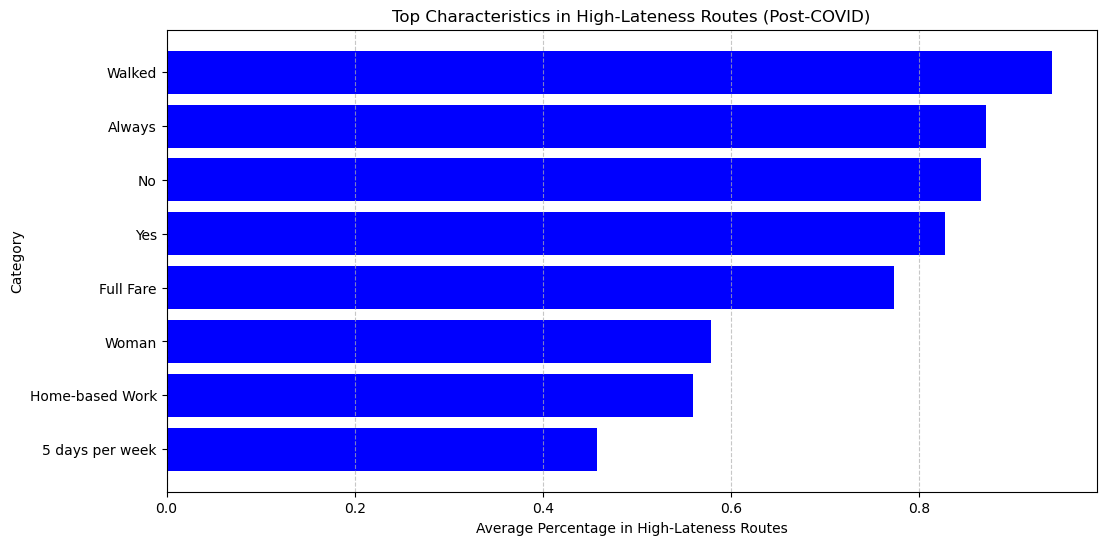

In [16]:
# Select top 10 characteristics
df_plot = category_analysis.head(10)

# Plot the categories
plt.figure(figsize=(12, 6))
plt.barh(df_plot["category"], df_plot["weighted_percent"], color="blue")

# Formatting
plt.xlabel("Average Percentage in High-Lateness Routes")
plt.ylabel("Category")
plt.title("Top Characteristics in High-Lateness Routes (Post-COVID)")
plt.gca().invert_yaxis()  # Highest values at the top
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show plot
plt.show()